In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('train.csv' , usecols=['Age','Fare','Survived'])

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [11]:
df.shape

(891, 3)

In [13]:
df.dropna(inplace=True)

In [15]:
df.shape

(714, 3)

In [17]:
# Lets train the model without applying any sort of transformation or bining

In [19]:
X=df.iloc[:,1:]
Y=df['Survived']

In [21]:
X_train,X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [23]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [25]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred=clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6153846153846154

In [31]:
# cross validation

np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy'))

0.6274843505477308

In [77]:
trf1 = ColumnTransformer([
    ('first',KBinsDiscretizer(n_bins=10, encode ='ordinal', strategy = 'quantile'),[0]),
    ('second',KBinsDiscretizer(n_bins=10, encode ='ordinal', strategy = 'quantile'),[1])
])

In [79]:
X_train_trf = trf1.fit_transform(X_train)
X_test_trf = trf1.transform(X_test)

In [81]:
X_train_trf

array([[5., 5.],
       [4., 4.],
       [5., 5.],
       ...,
       [7., 9.],
       [6., 5.],
       [6., 2.]])

In [83]:
clf1 = DecisionTreeClassifier()

clf1.fit(X_train_trf,y_train)

DecisionTreeClassifier()

In [85]:
y_pred1 = clf1.predict(X_test_trf)
accuracy_score(y_test,y_pred1)

0.6223776223776224

In [113]:
def discretize(bins,strategy):
    trf2 = ColumnTransformer([
    ('first',KBinsDiscretizer(n_bins=bins, encode ='ordinal', strategy = strategy),[0]),
    ('second',KBinsDiscretizer(n_bins=10, encode ='ordinal', strategy = strategy),[1])])
    X_trf = trf2.fit_transform(X)
    meann = np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,Y,cv=10,scoring='accuracy'))
    print("Cross Validation Accuracy is : ",meann*100)
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")
    plt.subplot(122)
    plt.hist(X_trf[:,0], color='red')
    plt.title("After")
    plt.show()
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")
    plt.subplot(122)
    plt.hist(X_trf[:,1], color='red')
    plt.title("After")
    plt.show()
    

Cross Validation Accuracy is :  64.85524256651016


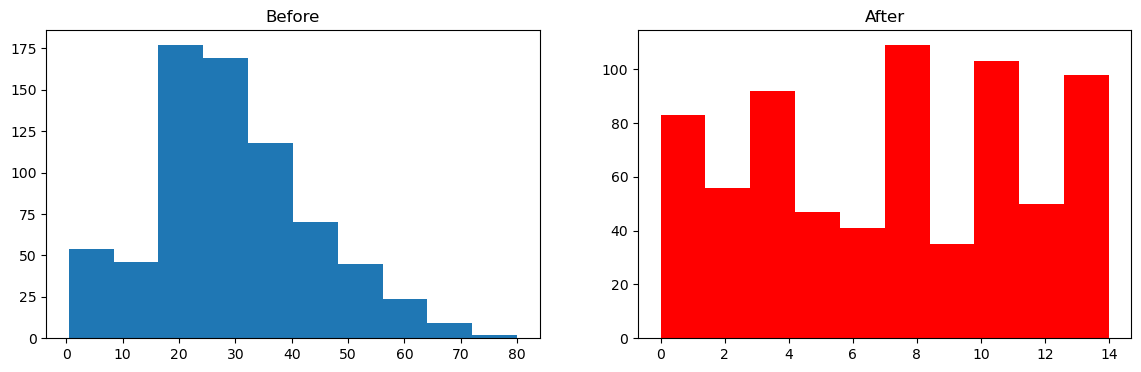

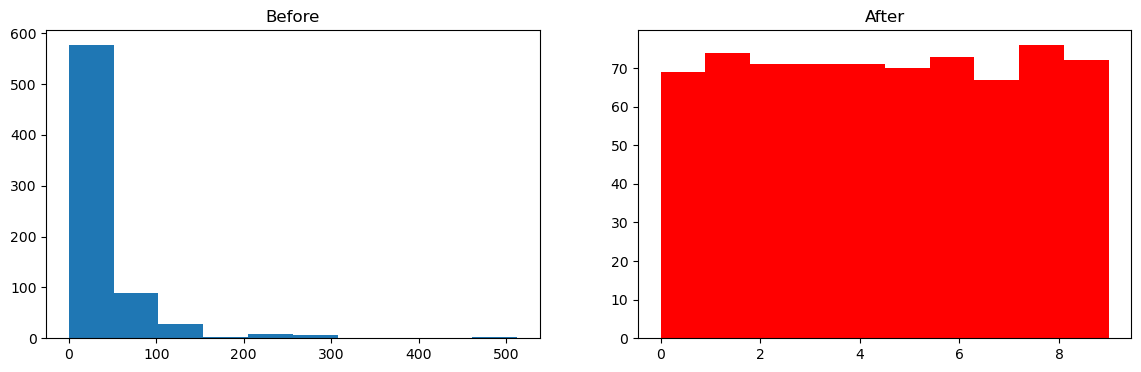

In [115]:
discretize(15,'quantile')